In [1]:
# importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tkinter as tk
from tkinter import filedialog
import pathlib
from keras.layers import Dense, GlobalAveragePooling2D, Conv2D, MaxPool2D, Flatten, Input, ZeroPadding2D, BatchNormalization
from keras.layers import Activation,MaxPooling2D, Add,AveragePooling2D
from keras.models import Model
from tensorflow.keras.optimizers import Adam


In [2]:
# Fetching the dataset
data = 'Train'
data = pathlib.Path(data)

In [3]:
# Data preprocessing for Training Set
batch_size=32
height = 75
width = 75

train_data=tf.keras.utils.image_dataset_from_directory(
    data,
    batch_size=batch_size,
    seed=123,
    validation_split=0.2,
    subset="training",
    image_size=(height,width)
)

Found 10000 files belonging to 2 classes.
Using 8000 files for training.


In [4]:
# Data preprocessing for Validation Set
valid_data=tf.keras.utils.image_dataset_from_directory(
    data,
    batch_size=batch_size,
    seed=123,
    validation_split=0.2,
    subset="validation",
    image_size=(height,width)
)

Found 10000 files belonging to 2 classes.
Using 2000 files for validation.


In [5]:
# Sowing the classes in Train Set
train_label_name = train_data.class_names
print(train_label_name)

['WithMask', 'WithoutMask']


In [6]:
# Sowing the classes in Validation Set
valid_label_name = valid_data.class_names
print(valid_label_name)

['WithMask', 'WithoutMask']


In [7]:
# Automatically shuffling the images @ 1000 images per fetch
autotune=tf.data.experimental.AUTOTUNE
train_data=train_data.cache().shuffle(1000).prefetch(buffer_size=autotune)

valid_data=valid_data.cache().prefetch(buffer_size=autotune)

In [8]:
# Building the inceptionv3 model 
inceptionV3_model = Sequential()
pretrained_model = tf.keras.applications.InceptionV3(
                            include_top=False,
                            input_shape=(height,width,3),
                            pooling="max",
                            classifier_activation="sigmoid",
)

inceptionV3_model.add(pretrained_model)
inceptionV3_model.add(Flatten())
inceptionV3_model.add(Dense(1, activation = 'sigmoid'))

87910968/87910968 [==============================] - 276s 3us/step


In [9]:
inceptionV3_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2048)              21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 21,804,833
Trainable params: 21,770,401
Non-trainable params: 34,432
_________________________________________________________________


In [10]:
inceptionV3_model.compile(Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
# Total no. of iterations to be carried out during training
noepochs = 7

In [12]:
# Running the epochs on inceptionV3 model
mymodel = inceptionV3_model.fit(train_data,validation_data=valid_data,epochs=noepochs)

Epoch 1/7
250/250 [==============================] - 387s 1s/step - loss: 0.0785 - accuracy: 0.9749 - val_loss: 0.1164 - val_accuracy: 0.9770
Epoch 2/7
250/250 [==============================] - 368s 1s/step - loss: 0.0213 - accuracy: 0.9936 - val_loss: 0.1524 - val_accuracy: 0.9815
Epoch 3/7
250/250 [==============================] - 368s 1s/step - loss: 0.0231 - accuracy: 0.9945 - val_loss: 0.0242 - val_accuracy: 0.9945
Epoch 4/7
250/250 [==============================] - 366s 1s/step - loss: 0.0446 - accuracy: 0.9879 - val_loss: 0.2469 - val_accuracy: 0.9660
Epoch 5/7
250/250 [==============================] - 365s 1s/step - loss: 0.0450 - accuracy: 0.9910 - val_loss: 0.0348 - val_accuracy: 0.9865
Epoch 6/7
250/250 [==============================] - 365s 1s/step - loss: 0.0375 - accuracy: 0.9900 - val_loss: 0.0401 - val_accuracy: 0.9900
Epoch 7/7
250/250 [==============================] - 365s 1s/step - loss: 0.0156 - accuracy: 0.9961 - val_loss: 0.0782 - val_accuracy: 0.9705


In [13]:
epoch_range=range(noepochs)
acc=mymodel.history['accuracy']
val_acc = mymodel.history['val_accuracy']
loss=mymodel.history['loss']
val_loss=mymodel.history['val_loss']

Text(0.5, 1.0, 'Training and validation Accuracy')

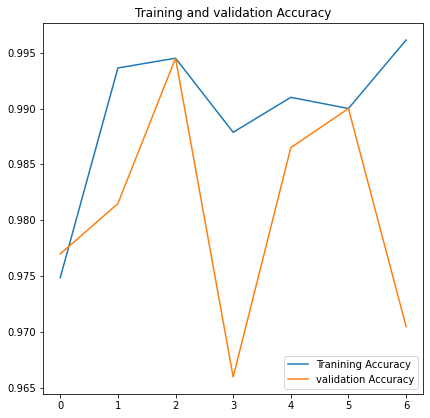

In [14]:
# Plotting the accuracy for training and validation sets
plt.figure(figsize=(15,15))
plt.subplot(2,2,2)
plt.plot(epoch_range,acc,label='Tranining Accuracy')
plt.plot(epoch_range,val_acc,label='validation Accuracy')
plt.legend(loc ="lower right")
plt.title("Training and validation Accuracy")

Text(0.5, 1.0, 'Training and validation loss')

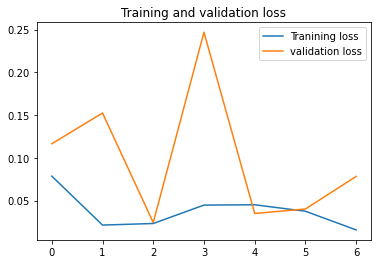

In [15]:
# plotting the loss for training and validation sets
plt.subplot(1,1,1)
plt.plot(epoch_range,loss,label='Tranining loss')
plt.plot(epoch_range,val_loss,label='validation loss')
plt.legend(loc ="upper right")
plt.title("Training and validation loss")

In [17]:
# Fetching the image to be tested using the trained model
image = cv2.imread("Face Mask Detection/Train/WithMask/10.png")

In [ ]:
# resizing the image using opencv and storing it
image_resized = cv2.resize(image, (height, width))
image = np.expand_dims(image_resized, axis = 0)
print(image.shape)

In [ ]:
# making prediction on the given image
pred = inceptionV3_model.predict(image)

In [ ]:
predicted_class = train_label_name[np.argmax(pred)]
print("Predicted Class: ", predicted_class)